<a href="https://colab.research.google.com/github/D34dP0oL/4216_Biomedical_DS_and_AI/blob/main/Sheet5/Assignment5_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import math
import pandas as pd
import random as rand
from random import randint

from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import bisect

from itertools import combinations

from scipy.spatial.distance import euclidean


from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Biomedical Data Science & AI

## Assignment 5

#### Group members:  Fabrice Beaumont, Fatemeh Salehi, Genivika Mann, Helia Salimi, Jonah

---
### Exercise 1 - *k*-means clustering


#### 1.1. Use the $k$-means algorithm and Euclidean distance to cluster the 10 data points into $k=3$ clusters. The coordinates of the data points are given in table 1. Use the data points a4, a5 and a8 as initialization and perform 2 iteration steps. You can do the cluster assignment also visually without computing the exact distances.

|  | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ | $a_6$ | $a_7$ | $a_8$ | $a_9$ | $a_{10}$ |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $(x,y)$ | $(2,1)$ | $(5,7)$ | $(3,2)$ | $(4,8)$ | $(3,1)$ | $(7,4)$ | $(4,6)$ | $(6,4)$ | $(3,7)$ | $(6,3)$ |

In [7]:
# Initialize cluster colors for task 1 and 2
cluster_colors = ["red", "green", "blue"]
for _ in range(20-3):
    cluster_colors.append('#%06X' % randint(0, 0xFFFFFF))

In [11]:
 def plot_clustering(data, centers, plot_title, membership_list=None):
    """
    This method takes 
    - a matrix of 2D data points (list, containing two entries for both coordinates)
    - a matrix of 2D centers points (list, containing two entries for both coordinates)
    Optional input:
    - a membership vector indicating which data points belongs to which center point (its cluster)
    
    It computes a plot that displays the data an centers. If the cluster memberships are 
    known, it colors the data belonging to one cluster in the same color.
    """

    if membership_list is None:
        membership_list = [-1] * len(data)

    # Plot the data points with the colors of their cluster
    for i, _ in enumerate(data):
        if membership_list[i] == -1:
            plt.scatter(data[i][0], data[i][1], color="black")
        else:
            plt.scatter(data[i][0], data[i][1], color=cluster_colors[membership_list[i]], alpha=0.5)
            
    # Plot the cluster centers with different colors
    for i, _ in enumerate(centers):
        plt.scatter(centers[i][0], centers[i][1], marker='+', s=300, color=center_colors[i])

    plt.title(plot_title)
    plt.show()

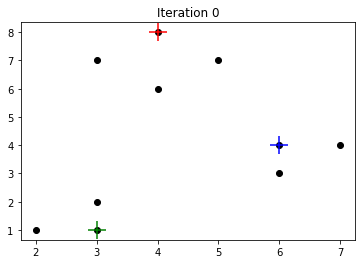

In [12]:
# Initialize cluster centers (usually some sort of randomized)
x_centers = [4, 3, 6]
y_centers = [8, 1, 4]

# A more interesting initialization with the same outcome is:
# x_centers = [3, 5, 6]
# y_centers = [4, 2, 8]

# Example for a vanishing cluster center
# x_centers = [4, 5, 7]
# y_centers = [5, 3, 8]

x_data = [2, 5, 3, 4, 3, 7, 4, 6, 3, 6]
y_data = [1, 7, 2, 8, 1, 4, 6, 4, 7, 3]

plot_clustering(list(zip(x_data, y_data)), list(zip(x_centers, y_centers)), f"Iteration 0")

In [17]:
def my_k_means(data, centers, nr_iterations, membership_vector=None):
    """
    This method performs k-means clustering for 'nr_iterations' and displays
    the chaning cluster centers and memberships in successive plots.

    The E-step (estimating the data memberships) and the M-step
    (recalculating the cluster centers) are displayed in two different plots.
    """
    if membership_vector is None:
        membership_vector = [-1] * len(data)

    for iteration in range(nr_iterations): 
        # Iterate through all points and assign them to their closest cluster        
        for point_index, point in enumerate(data):
            min_distance = math.inf

            for center_index, center in enumerate(centers):
                # Check if the point could be assignd to the cluster
                tmp_distance = euclidean(point, center)
                # If a closer center has been found, assign the point to it
                if tmp_distance < min_distance:
                        min_distance = tmp_distance
                        membership_vector[point_index] = center_index

        # Print the intermediate clustering after estimating the data to the cluster centers
        plot_clustering(data, centers, f"Iteration {iteration+1} - After E-step", membership_vector)

        # Redefine the cluster centers
        for cluster_index in range(len(centers)):
            # Add all members of this cluster
            cluster_sum = [0, 0]
            cluster_size = 0
            for point_index, point in enumerate(data):
                if membership_vector[point_index] == cluster_index:
                    cluster_sum[0] += point[0]
                    cluster_sum[1] += point[1]
                    cluster_size = cluster_size + 1

            # Get the mean of the cluster
            cluster_mean = [cluster_sum[0] /cluster_size, cluster_sum[1] /cluster_size]
            centers[cluster_index] = (cluster_mean[0], cluster_mean[1])

        # Print the intermediate clustering after reassigning the cluster centers
        plot_clustering(data, centers, f"Iteration {iteration+1} - After M-step", membership_vector)

    plt.show()

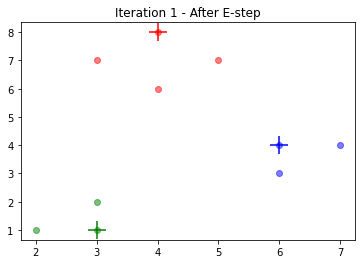

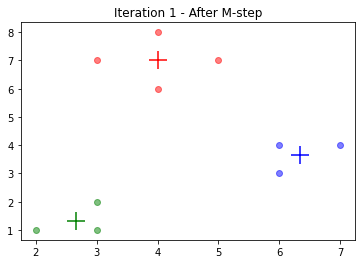

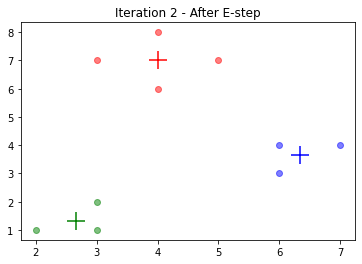

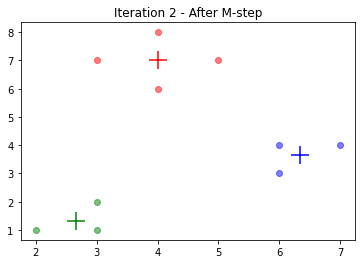

In [18]:
# Execute the k-means using the initialization from above for two iterations
my_k_means(list(zip(x_data, y_data)), list(zip(x_centers, y_centers)), nr_iterations=2)

#### 1.2. Shown are the results of a $k$-means clustering with two different initializations:

In [19]:
!wget https://raw.githubusercontent.com/D34dP0oL/4216_Biomedical_DS_and_AI/main/Sheet5/img_sheet5_ex1-2.png

--2021-06-02 11:09:34--  https://raw.githubusercontent.com/D34dP0oL/4216_Biomedical_DS_and_AI/main/Sheet5/img_sheet5_ex1-2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250464 (245K) [image/png]
Saving to: ‘img_sheet5_ex1-2.png’

img_sheet5_ex1-2.pn 100%[===================>] 244.59K  --.-KB/s    in 0.06s   

2021-06-02 11:09:35 (3.73 MB/s) - ‘img_sheet5_ex1-2.png’ saved [250464/250464]



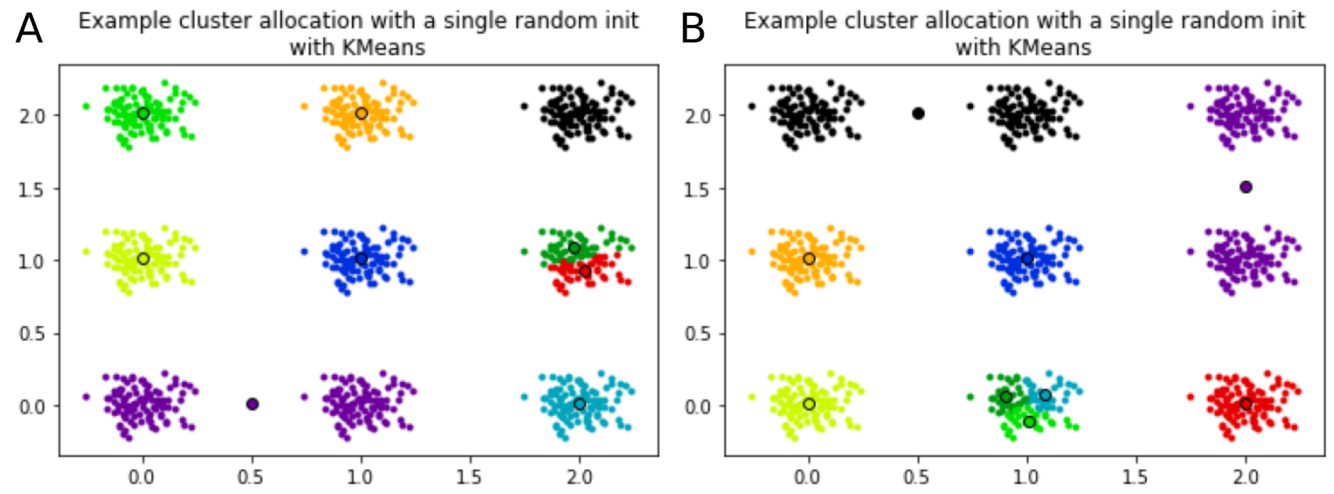

In [21]:
from IPython.display import Image
Image('img_sheet5_ex1-2.png')

##### 1.2.a. How does the choice of the initial starting points affect the clustering?

Since in this variant of $k$-means, the number of cluter centers is fixed, the different initial starting points can not affect the number of cluters. However they can effect the **sizes of the clusters**. Most noticable, depending on the starting points, **empty** clusters may appear.

##### 1.2.b. How can you avoid getting a clustering result that is dependent on the initialization?

This is a general question, and not directed at $k$-means. In general, no randomization should take place (e.g. the random initialization of the initializ starting points) to make the algorithm deterministic. Secondly, depending on the expected kind of clustering, different algorithms may simply be more suited by construction. (Note that $k$-means with Euclidean distance for example will always producte convex clusters!)

With respect to $k$-means, the dependence on the initial starting points can be reduced, by 
- **running multiple executions** with different initializations. Then use some measurement to select the most suited outcome. For example by **peanalizing big differences incluster sizes**, or **cluster centers that are close** to each other.
- initializing  **more cluster centers than needed** (**distributed uniformly** over the domain)
- allowing clusters to **collapse** (if the centers are to close) or to **vanish** (if empty).
- using **furtherest point heuristic**
- using different initialization strategies such as **Forgy initialization**, **Random Partition initialization** or **k-means++ initialization**.
- using **mini batches** instead of full dataset.

Combinations of these methods are also possible.




##### 1.2.c. What are the pros and cons of the $k$-means clustering?

Pros:
- Simple (easy to implement)
- Few parameters
- Rather fast (fast convergence)
- (Mostly) unsupervised
- Sacles to large datasets (using a clever distance computation)
- Guaranteed convergence

Cons:
- Only convex clusters and hard assignment
- Parameter $k$ with huge impact on the solution
- Will probabilty stuck in a local optima
- Only hard cluster assignments
- Sensitivity to outliers
- Does not perform well for high dimensional data (**curse of dimensionality**)


#### 1.3. Use the provided breast cancer data (`cancer.csv`) to perform a $k$-means clustering. Perform the clustering for a range of clusters between 2 and 10. Set the `random_state` to 20 to keep reproducibility.

In [22]:
nr_trials = 3

In [24]:
breast_cancer_db = pd.read_csv('https://raw.githubusercontent.com/D34dP0oL/4216_Biomedical_DS_and_AI/main/Datasets/cancer.csv', index_col='Unnamed: 0')
breast_cancer_db.head(4)

,mean radius,mean concavity
0,17.99,0.3001
1,20.57,0.0869
2,19.69,0.1974
3,11.42,0.2414


In [27]:
# Performing k-means clustering for k=2...10 with random_state=20
kmeans_results = []
for k in range(2, 11, 1):
    kmeans = KMeans(n_clusters = k, random_state = 20).fit(breast_cancer_db)
    kmeans_results.append(kmeans.labels_)

##### 1.3.a. For each clustering plot the cluster assignment within a scatter plot for the features `mean radius` and `mean concavity`.

Silhouette score of Clusering with k=2 is 0.647619079072133


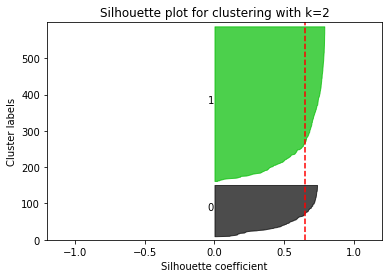

Silhouette score of Clusering with k=3 is 0.5469222281803169


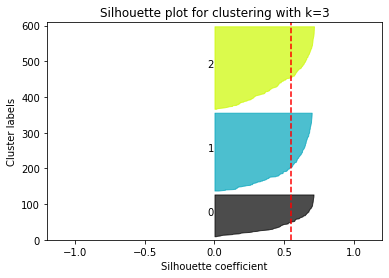

Silhouette score of Clusering with k=4 is 0.508542039977521


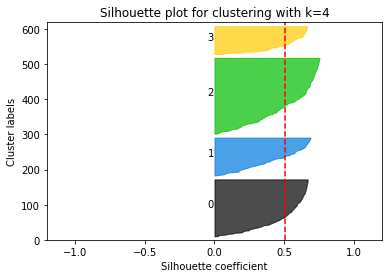

Silhouette score of Clusering with k=5 is 0.5261729172840707


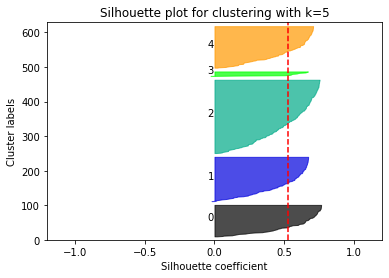

Silhouette score of Clusering with k=6 is 0.5377467118180296


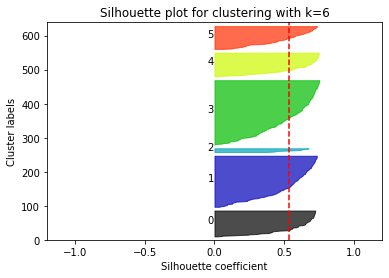

Silhouette score of Clusering with k=7 is 0.5469325471612358


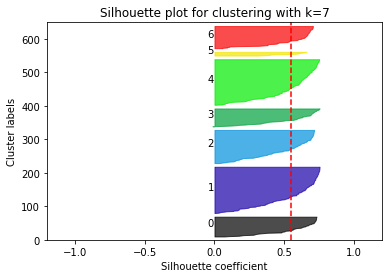

Silhouette score of Clusering with k=8 is 0.5266974477015695


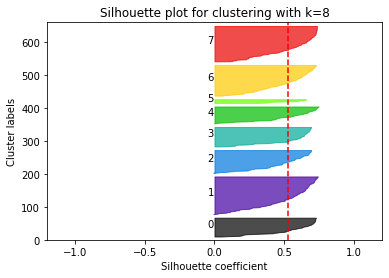

Silhouette score of Clusering with k=9 is 0.5160821970595456


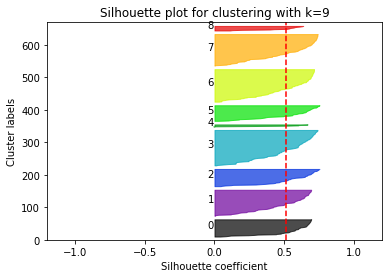

Silhouette score of Clusering with k=10 is 0.5160138218415714


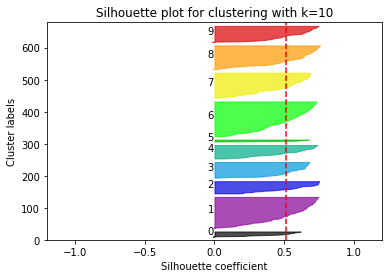

In [33]:
# Iterate over clustering results
for i in range(len(kmeans_results)):
    
    # Store clustering result in y
    results = kmeans_results[i]
    
    # Plot silhouette plots of clustering    
    plt.xlim([-1.2, 1.2])
    plt.ylim([0, breast_cancer_db.shape[0] + (i+3) * 10])

    # compute average silhouette scores
    cluster_silhouette_score = silhouette_score(breast_cancer_db, results)
    print(f'Silhouette score of Clusering with k={i+2} is {cluster_silhouette_score}')
    
    # compute silhouette score for each sample in clustering
    sample_silhouette_coefficient = silhouette_samples(breast_cancer_db, results)
    
    results_lower = 10
    
    # iterating of each cluster of the clustering
    for current_cluster in range(i+2):
        
        # extract silhouette values of current cluster and sort them
        silhouette_value_of_current_cluster = sample_silhouette_coefficient[results == current_cluster]
        silhouette_value_of_current_cluster.sort()
        
        # calculate the value of 'results_upper'
        size_of_current_cluster = len(silhouette_value_of_current_cluster)
        results_upper = results_lower + size_of_current_cluster
        
        # create plot
        color = cm.nipy_spectral(float(current_cluster) / (i+2))
        plt.fill_betweenx(np.arange(results_lower, results_upper), 0, silhouette_value_of_current_cluster, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, results_lower + 0.5 * size_of_current_cluster, str(current_cluster))
        
        # update 'results_lower' for next plot
        results_lower = results_upper + 10
        
    # plot line showing average silhouette coefficient for clustering
    plt.axvline(x = cluster_silhouette_score, color = 'red', linestyle='--')
    
    plt.title(f'Silhouette plot for clustering with k={i+2}')
    plt.xlabel(f'Silhouette coefficient')
    plt.ylabel(f'Cluster labels')
    plt.show()

##### 1.3.b. For each clustering create silhouette plots and print out the score.

In [ ]:
# I am not sure which score is referenced at. Also silhouett plot is not clear.
# While I guess some fort of execution of the following function is desired, I am unwilling to continue right now..
# metrics.silhouette_score(list(zip(x_radii, y_concavity)), list(zip(x_radii_centers)), metric="euclidean", sample_size=len(x_radii))

##### 1.3.c. Which is the best choice for the number of clusters? Why?

$k=10$ is the best choice for the number of clusters:

Observing the Silhouette plots, we see that there are clusters with below average silhouette scores for all $k$ values except $k=10$. The clustering performed by taking $k=10$ has the highest silhouette coefficient of $0.8$ indicating that it is denser and well separated as compared to other clustering. Most of  cluster silhouettes of $k=10$ clustering are of equal thickness while the cluster silhouettes of other $k$ values have greater fluctuations in thickness of silhouettes.

#### 1.4. Explain the difference between $k$-means and $k$-medoids.

While a **mean** corresponds to the geometric gravity, a **medoid** is a *data point* itself - which comes closest to the mean. 
Thus using medoids means only using real data and clustering the data arount existing data points. 

Depending on the data, this may lead to better or worse results. Note however, that $k$-medoids is in general **more robust** to outliers and noise.

---
### Exercise 2 - Gaussian misture models

#### 2.1. Explain the EM-Algorithm in your own words, without using any formula. 

An **Expectation Maximization (EM)** algorithm is an algorithm that makes an assumption/initialization/first guess about a solution, and then refines it. The two main steps, which are executed repetedly alternatingly, are:
1. *E-step*: Estimate some solution, as expectation based on the currently gathered knowledge
1. *M-step*: Based on the last estimation, refine/improve the solution with help of some measurement.

To differentiate the **Maximum Likelihood Estimation Algorithm (ML)** versus the **Expectation Maximation Algorithm (EM)** note that the former
- assumes that the dataset is complete and does not contain any unobserved variables. Hence the ML-algorithm cannot be used on data with unobserved variables.
while the latter
- is an approach for performing maximum likelihood estimation in the presence of unobserved (latent) variables.

#### 2.2.  The complexity of the Gaussian mixture model can be controlled by restricting how the covariance matrices are allowed to vary. Assume your data has three features and you want to cluster it into 2 clusters.

In [ ]:
# Useful resource see: http://ethen8181.github.io/machine-learning/clustering/GMM/GMM.html

##### 2.2.a. How many parameters (depending on the number of clusters) need to be estimated in the most general model (no restrictions on the covariances)?

Let $D = 3$ be the dimensions of the gaussians, $k=2$ be the no. of gaussian mixtures or clusters.

The no. of parameters to be estimated are $3*3*2+3*2+2= 26$ parameters


In the most general GMM with no restriction on co-variances, the no. of parameters which need to be estimated by the model are, $$(D*D*k)+(D*k)+k$$
Here $D*D*k$ term is due to k covariance matrices of size $D*D$, the term $D*k$ is  due to $k$ mean vectors of length $D$ and the last term $k$ is due to weight vector of length $k$.

An alternate formula to calculate no. of parameters to be estimated:
 $Df = (D*D - D)/2 + 2*D + 1$ for each gaussian. Given you have k components, you have (k*Df)-1 parameters. Because the mixing weights must sum to 1, you only need to find k-1 of them. The kth weight can be calculated by subtracting the sum of the (k-1) weights from 1 so in our case $Df = (3*3-3)/2 + 6 + 1$, $Df= 10$ and given 2 components then : $(2*10)-1 = 19$parameters

##### 2.2.b. Assuming that there is no correlation between the variables for each Gaussian, how many parameters does this model need to estimate?

Since there is no correlation hence the non-diagonal elements of the covariance matrix will be zero.
The no. of parameters to be estimated are $D*k+D*k+k = 6+6+2 = 14$ parameters

##### 2.2.c. Assuming that there is neither correlation nor does the variation for each feature change. How many parameters does the model have to estimate now?

Since there is no correlation hence the non-diagonal elements of the covariance matrix will be zero.
Also, the diagonal elements of the covariance matrix will also be constant as the variation between the feature does not change.
The no. of parameters to be estimated are $k+k+k = 2+2+2 = 6$ parameters

#### 2.3. Cluster the breast cancer dataset (on the entire dataset: `cancer_all.csv`) with the help of a Gaussian mixture model. Perform the clustering for a range of clusters between 2 and 10 and for all possible assumptions for the covariance matrices. Plot the **Bayesian Information Criterion** (BIC) of each clustering.

In [36]:
cancer_data = pd.read_csv('https://raw.githubusercontent.com/D34dP0oL/4216_Biomedical_DS_and_AI/main/Datasets/cancer_all.csv', index_col = 'Unnamed: 0')
cancer_data.head(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [38]:
bic_results_full = []
bic_results_tied = []
bic_results_diag = []
bic_results_spherical = []

for k in range(2, 11, 1):
    # Create models for each covariance type
    gmm_model_full = GaussianMixture(n_components = k).fit(cancer_data)  
    gmm_model_tied = GaussianMixture(n_components = k, covariance_type = 'tied').fit(cancer_data)
    gmm_model_diag = GaussianMixture(n_components = k, covariance_type = 'diag').fit(cancer_data)
    gmm_model_spherical = GaussianMixture(n_components = k, covariance_type = 'spherical').fit(cancer_data)
    
    # Accumulate the BIC score for each model
    bic_results_full.append(gmm_model_full.bic(cancer_data))
    bic_results_tied.append(gmm_model_tied.bic(cancer_data))
    bic_results_diag.append(gmm_model_diag.bic(cancer_data))
    bic_results_spherical.append(gmm_model_spherical.bic(cancer_data))

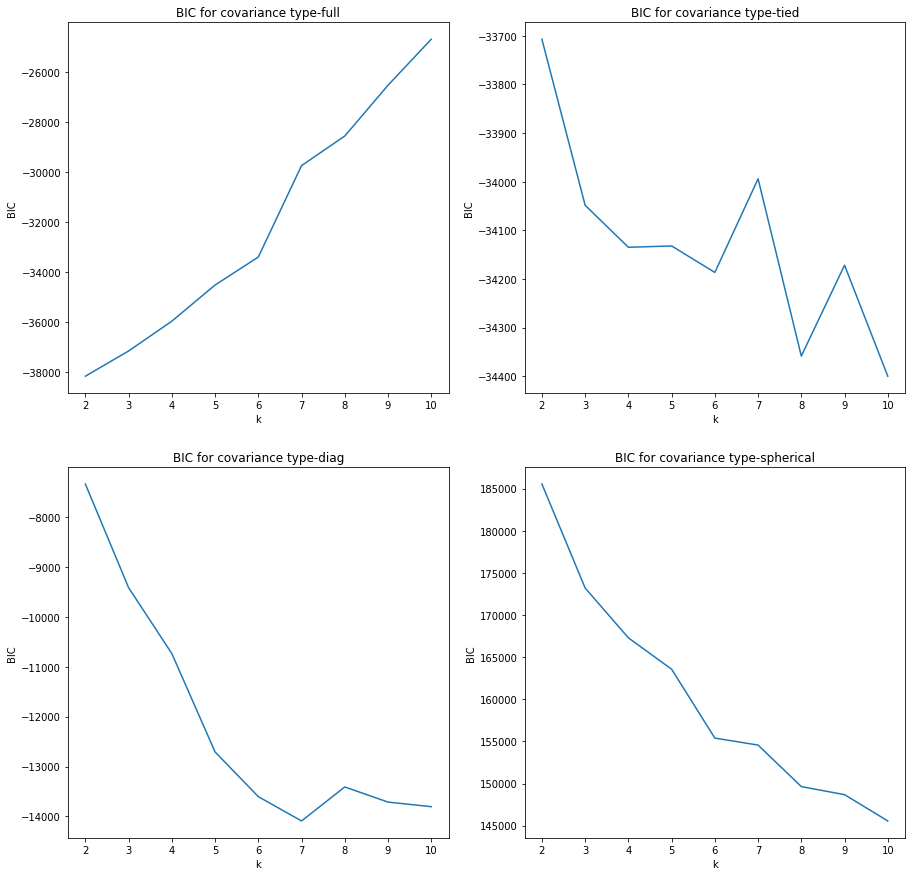

In [39]:
# Plot the BIC scores for every setting
fig, axs = plt.subplots(2,2, figsize=(15,15))

axs[0, 0].plot(range(2, 11, 1), bic_results_full)
axs[0, 0].set_title('BIC for covariance type-full')
axs[0, 0].set_xlabel('k')
axs[0, 0].set_ylabel('BIC')


axs[0, 1].plot(range(2, 11, 1), bic_results_tied)
axs[0, 1].set_title('BIC for covariance type-tied')
axs[0, 1].set_xlabel('k')
axs[0, 1].set_ylabel('BIC')


axs[1, 0].plot(range(2, 11, 1), bic_results_diag)
axs[1, 0].set_title('BIC for covariance type-diag')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('BIC')


axs[1, 1].plot(range(2, 11, 1), bic_results_spherical)
axs[1, 1].set_title('BIC for covariance type-spherical')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('BIC')
plt.show()

##### 2.3.a. Which is the best choice for the clustering? Why?

BIC gives us an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have. 
In order to avoid overfitting, this technique penalizes models with big number of clusters. 

So now in our case $k=2$ with `covariance_type='full'` is the best choice of number of cluster because it has the lowest BIC.

##### 2.3.b. Plot the data (features `mean radius` and `mean compactness`), the cluster assignment and ellipses (to show the Gaussian component) for your selected model.

In [45]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

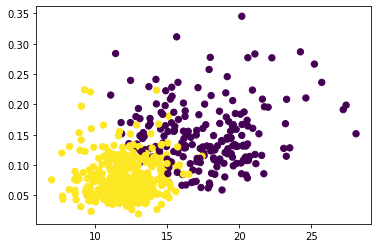

In [46]:
gmm = GaussianMixture(n_components=2)
gmm.fit(cancer_data)
labels = gmm.predict(cancer_data)

# Plot the fittet model
ax = plt.gca()
ax.scatter(cancer_data.loc[:, 'mean radius'], cancer_data.loc[:, 'mean compactness'], c=labels, s=40, cmap='viridis')

#### 2.4. How does the $k$-means model differ from the GMM model? Which model would you prefer for the given data and why?

$K$-Means Clustering:

>$K$-Means clustering is an algorithm, which classifies samples based on attributes/features into $K$ number of clusters. Clustering or grouping of samples is done by *minimizing the distance between sample and the centroid*. i.e. assign the centroid and optimize the centroid based on the distances from the points to it. This is called as Hard Assignment i.e. We are certain that particular points belong to particular centroid and then based on the least squares distance method, we will optimize the place of the centroid.

> Advantages of K-Means:

1. Running Time

1. Better for high dimensional data.

1. Easy to interpret and Implement.

> Disadvantages of K-Means:

1. Assumes the clusters as spherical, so does not work efficiently with complex geometrical shaped data(Mostly Non-Linear)

1. Hard Assignment might lead to mis grouping.

Guassian Mixture:

>Instead of Hard assgning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster.

> Advantages:

1. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.

1. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).

> Disadvantages:

1. Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high.

1. Difficult to interpret

Based on the above points, **$k$-Means should perform better** on this dataset, since as it has 30 dimensions - which is more difficult for GMM.

#### 2.5. Generate the $k$-Means model for the entire dataset and visualise both $k$-Mean and GMM models using PCA.

In [47]:
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(cancer_data)
# Create a PCA instance: pca
pca = PCA()
principalComponents = pca.fit_transform(X_std)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

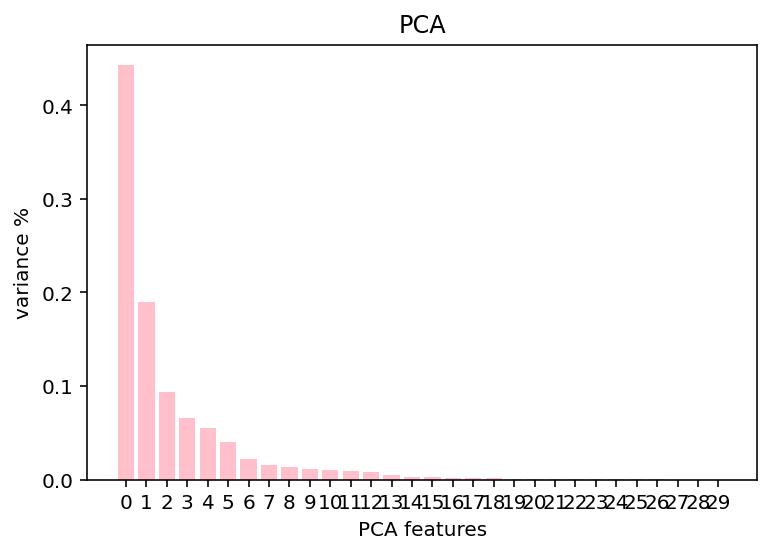

In [50]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='pink')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.title('PCA')
plt.xticks(features)
plt.show()

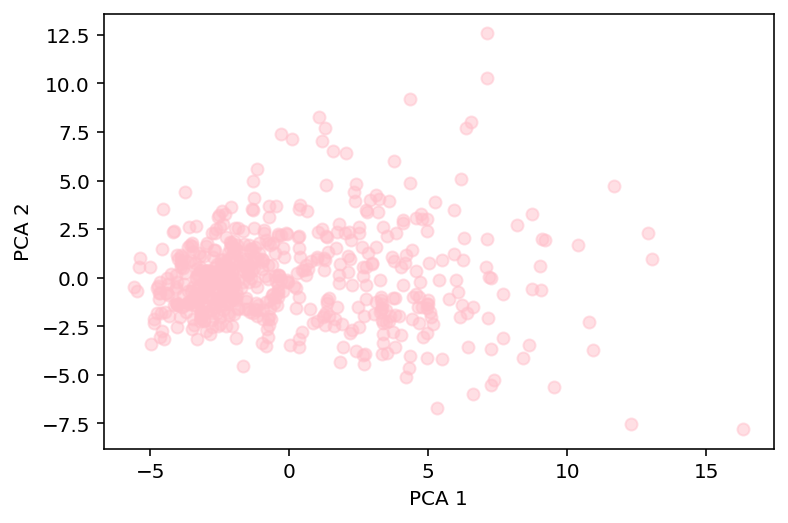

In [51]:
# Create a scatter plot of the first two principal components
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, color='pink')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [52]:
inertias = []

# Creating 10 k-mean models for k=1,...,10
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

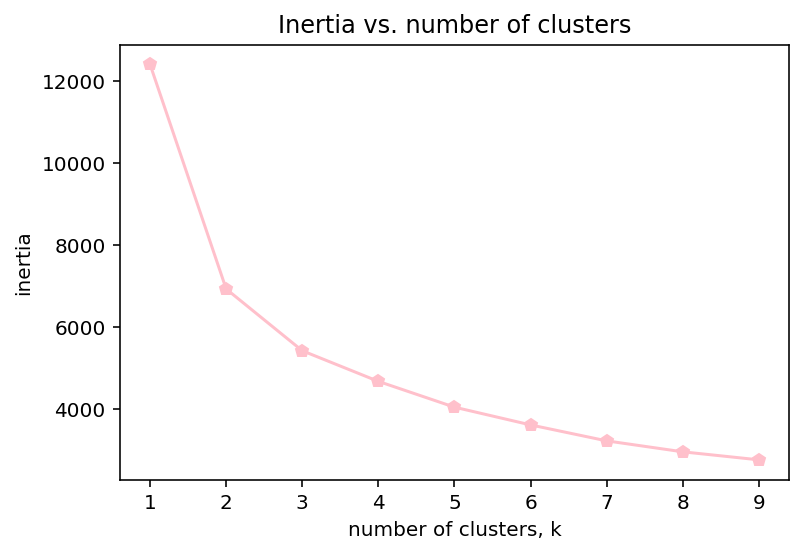

In [54]:
# Plot the inertia distances versus the amount of clusters
plt.plot(range(1,10), inertias, '-p', color='pink')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Inertia vs. number of clusters')
plt.show()

The figure above indicates that approximately *3* clusters the change in the value of inertia is no longer significant.
Most likely, neither is the variance of the rest of the data after this elbow point.

Therefore we can discard everything after $k=3$ and proceed to the last step in the process.

In [57]:
labels = [None, None]

model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])
labels[0] = model.predict(PCA_components.iloc[:,:2])

model = GaussianMixture(n_components=3)
model.fit(PCA_components.iloc[:,:2])
labels[1] = model.predict(PCA_components.iloc[:,:2])

plot_titles = ['k-means', 'k-means']

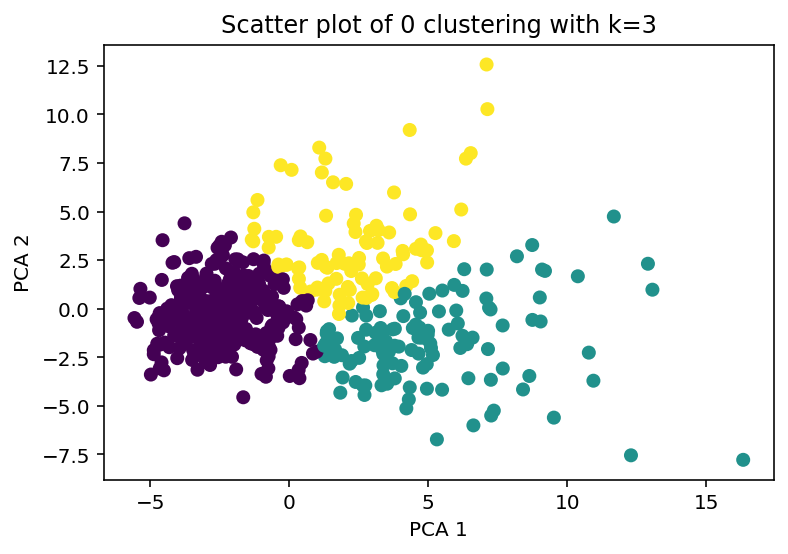

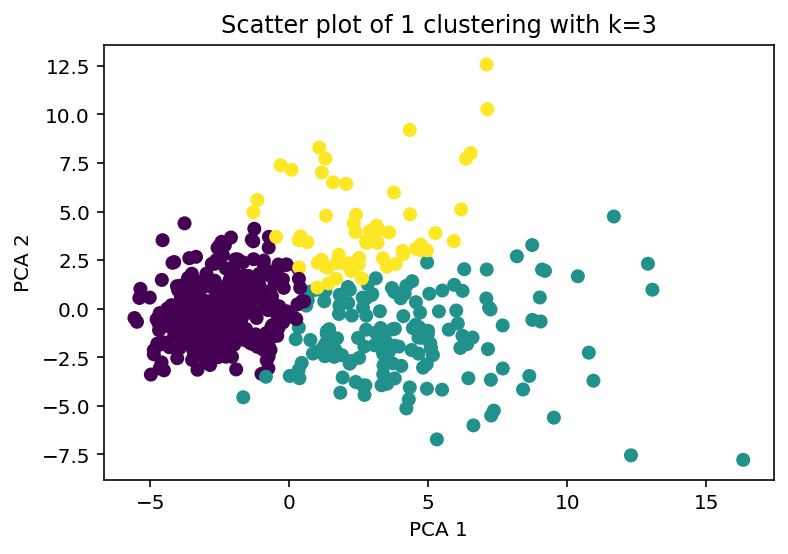

In [58]:
# Display the two clusterings
for i in range(len(plot_titles)):
    plt.scatter(PCA_components[0], PCA_components[1], c=labels[i])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(f"Scatter plot of {i} clustering with k=3")
    plt.show()

#### 2.6. What are the advantages of GMMs over $k$-means?

$k$-means only considers the mean to update the centroid while GMM takes into account the mean as well as the **variance** of the data. GMM is a lot more flexible since in terms of cluster **covariance**, $k$-means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches zero. This implies that a point will get assigned only to the cluster closest to it. 

With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in $k$-means. 

**As a result, cluster assignment is much more flexible in GMM than in $k$-means.**

On top of that, GMMs have soft boundaries because they perform probabilistic cluster assignments, while $k$-means have hard boundaries as they directly assign the point to a single cluster. GMMs represent the membership of each point in a cluster **probabilistically**.

---
### Exercise 3 - Consensus clustering

Perform **$k$-means consensus clustering** of samples for the given gene
expression data `allData.csv`. Take minimum clusters as *2*, maximum clusters as
*6*, resampling proportion as 80% and number of iterations as 10. Find the
following:

In [72]:
# Initialize the values as given in the task
sample_proportion = 0.8
min_nr_clusters = 2
max_nr_clusters = 6
nr_iterations = 10

In [68]:
gene_data = pd.read_csv('https://raw.githubusercontent.com/D34dP0oL/4216_Biomedical_DS_and_AI/main/Datasets/allData.csv', index_col="Unnamed: 0")
gene_data = gene_data.fillna(0)
gene_data.head(4)

,36638_at,39318_at,38514_at,266_s_at,38585_at,41266_at,36108_at,39389_at,31525_s_at,32612_at,36536_at,40202_at,33705_at,33516_at,33412_at,41166_at,32649_at,37006_at,33809_at,1065_at,37701_at,39729_at,40570_at,37043_at,36878_f_at,32035_at,38968_at,307_at,36773_f_at,41165_g_at,296_at,34033_s_at,38242_at,37399_at,41723_s_at,35926_s_at,41164_at,36239_at,34362_at,40775_at,...,35701_at,37888_at,40272_at,1202_g_at,38136_at,38434_at,32327_at,40455_at,1823_g_at,39119_s_at,35828_at,35566_f_at,32180_s_at,40418_at,40262_at,41607_at,394_at,32038_s_at,35677_at,38139_at,32472_at,40077_at,846_s_at,35883_at,31568_at,31880_at,35878_at,34689_at,41060_at,38198_at,37655_at,1440_s_at,32260_at,40070_at,1056_s_at,39200_s_at,36105_at,32578_at,39383_at,33718_at
01005,0.583368,0.535258,0.642984,0.891901,0.269871,0.605566,0.069070,0.938101,0.314737,0.590410,0.796561,0.850594,0.918978,0.240408,0.414888,0.691153,0.411294,0.637927,0.594209,0.518397,0.670180,0.332630,0.840712,0.631080,0.473505,0.851113,0.545758,0.457605,0.462939,0.868577,0.330381,0.801885,0.712293,0.134634,0.791588,0.787409,0.991021,0.543582,0.732365,0.176654,...,0.378084,0.483172,0.168982,0.330266,0.419703,0.571903,0.580894,0.234959,0.718483,0.114381,0.267416,0.144547,0.391687,0.348717,0.551471,0.410498,0.364310,0.407837,0.294238,0.237388,0.224433,0.200875,0.318495,0.124299,0.678597,0.353297,0.230118,0.438577,0.464230,0.337547,0.884590,0.399443,0.379796,0.272379,0.216088,0.355740,0.167203,0.438651,0.395720,0.273593
01010,0.505321,0.704177,0.913612,0.657634,0.402911,0.429698,0.803187,0.360471,0.718665,0.773198,0.346023,0.439240,0.575085,0.333801,0.267722,0.717744,0.164642,0.917898,0.095272,0.252275,0.123748,0.465028,0.534974,0.208745,0.748863,0.370238,0.785184,0.561516,0.752276,0.722854,0.224205,0.486049,0.578132,0.073096,0.969421,0.121779,0.639100,0.714173,0.301113,0.218048,...,0.801471,0.399995,0.444195,0.308787,0.128357,0.814556,0.308978,0.276849,0.583248,0.534276,0.540936,0.278203,0.397564,0.209693,0.316325,0.078122,0.366716,0.377046,0.226715,0.237455,0.328624,0.294165,0.441081,0.559321,0.691367,0.297660,0.406114,0.850692,0.225666,0.208741,0.086277,0.432789,0.431440,0.461242,0.443493,0.291054,0.102883,0.584035,0.589994,0.401375
03002,0.375805,0.073716,0.707562,0.847162,0.792428,0.819212,0.644334,0.735292,0.828776,0.821131,0.694593,0.912418,0.925177,0.604762,0.845645,0.102832,0.441828,0.960942,0.822917,0.579433,0.574525,0.209021,0.661056,0.446048,0.711056,0.422506,0.933707,0.548291,0.714249,0.260367,0.282758,0.977896,0.804228,0.809919,0.875175,0.835892,0.395444,0.679245,0.587615,0.268066,...,0.333469,0.406121,0.116223,0.227236,0.230363,0.476691,0.638118,0.138736,0.465002,0.177763,0.594686,0.107521,0.554402,0.391740,0.279571,0.297585,0.246278,0.163830,0.349512,0.319535,0.237265,0.570321,0.201130,0.137217,0.659292,0.323094,0.426197,0.176555,0.253732,0.405952,0.750758,0.305592,0.444996,0.293573,0.318939,0.259713,0.271869,0.556874,0.931118,0.301529
04006,1.000000,0.226960,0.119596,0.394317,0.115411,0.050117,0.440698,0.649291,0.498758,0.692290,0.087991,0.757562,0.264205,0.178758,1.000000,0.630364,0.023287,0.051236,0.037160,0.553999,0.181132,0.402491,0.379906,0.139041,0.481713,0.206804,0.526957,0.222823,0.431150,0.722786,0.562790,0.676347,0.385088,0.445281,0.772617,0.686851,0.719016,0.044023,0.266791,0.149898,...,0.820746,0.479706,0.209392,0.283426,0.224231,0.826304,0.036298,0.199957,0.851421,0.203652,0.542015,0.223738,0.000000,0.210257,0.510002,0.088128,0.628238,0.430658,0.274953,0.062263,0.217099,0.519138,0.394596,0.253829,0.846699,0.030612,0.160331,0.723064,0.393538,0.194421,0.090901,0.365967,0.170796,0.565408,0.456499,0.407845,0.100038,0.670769,0.541601,0.659517


#### 3.1. Best number of clusters.

In [70]:
def get_data_sample(pd_dataset, percentage):
    """
    This function returns random indices of `percentage` % of the 128 rows from the database 'pd_dataset',
    and the data, corresponding to this sample.
    """
    sampled_indices = np.random.choice(range(pd_dataset.shape[0]), size=int(pd_dataset.shape[0]*percentage), replace=False)
    return sampled_indices, pd_dataset.iloc[sampled_indices, :]

In [73]:
# TODO: Comment this code!
Mk = np.zeros((max_nr_clusters-min_nr_clusters+1, gene_data.shape[0], gene_data.shape[0]))
Is = np.zeros((gene_data.shape[0],)*2)

for k in range(min_nr_clusters, max_nr_clusters):
  i = k-min_nr_clusters
  for iter in range(nr_iterations):
    sampled_indices, sampled_data = get_data_sample(gene_data, sample_proportion)
    Mh = KMeans(n_clusters=k).fit_predict(sampled_data)
    id_clusts = np.argsort(Mh)
    sorted = Mh[id_clusts]
    # For each cluster TODO: finish this sentence
    for i in range(k): 
      ia = bisect.bisect_left(sorted, i)
      ib = bisect.bisect_right(sorted, i)
      is_ = id_clusts[ia:ib]
      ids = np.array(list(combinations(is_, 2))).T
    ids_2 = np.array(list(combinations(sampled_indices, 2))).T
    Is[ids_2[0], ids_2[1]] += 1
  Mk[i] /= Is+1e-8
  Mk[i] += Mk[i].T
  Mk[i, range(gene_data.shape[0]), range(gene_data.shape[0])] = 1
  # Reset the counter
  Is.fill(0)

Ak = np.zeros(max_nr_clusters-min_nr_clusters+1)

for i, m in enumerate(Mk):
  hist, bins = np.histogram(m.ravel(), density=True)
  Ak[i] = np.sum(iter*(b-a) for b, a, iter in zip(bins[1:], bins[:-1], np.cumsum(hist)))

deltaK = np.array([(Ab-Aa)/Aa if i > 2 else Aa for Ab, Aa, i in zip(Ak[1:], Ak[:-1], range(MnC, MxC))])
bestK = np.argmax(deltaK) + min_nr_clusters if deltaK.size > 0 else min_nr_clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


In [74]:
print(bestK)

2


In [75]:
# TODO: Finish this exercise sheet (= wait for solutions from the tutors.)

#### 3.2. Change in area under CDF.

In [76]:
# x = np.arange(2, 7, 1)
# plt.plot(x, deltaK)
# plt.xlabel("Number of clusters")
# plt.ylabel("delta k")

#### 3.3. Best cluster from the consensus matrix for each sample.